# **Loading Data and Preprossing**

In [1]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
download = drive.CreateFile({'id': '1iHnWEHRTLxCRl7LqYKTkuXSu5rlwnqqD'})
download.GetContentFile('new_data.csv') 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
dataset = pd.read_csv('new_data.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
import pandas as pd
dataset["time (yyyy MM dd)"] = pd.to_datetime(dataset["time (yyyy MM dd)"], format = "%Y-%m-%dT")

In [7]:
dataset

,time (yyyy MM dd),absolute_f107 (solar flux unit (SFU))
0,1951-11-01,107.3
1,1951-11-02,104.7
2,1951-11-03,106.1
3,1951-11-04,107.2
4,1951-11-05,114.0
...,...,...
25867,2022-08-27,128.0
25868,2022-08-28,252.0
25869,2022-08-29,131.0
25870,2022-08-30,126.0


# **Data Visualization**

In [8]:
dataset['year'] = dataset['time (yyyy MM dd)'].dt.year

In [9]:
dataset

,time (yyyy MM dd),absolute_f107 (solar flux unit (SFU)),year
0,1951-11-01,107.3,1951
1,1951-11-02,104.7,1951
2,1951-11-03,106.1,1951
3,1951-11-04,107.2,1951
4,1951-11-05,114.0,1951
...,...,...,...
25867,2022-08-27,128.0,2022
25868,2022-08-28,252.0,2022
25869,2022-08-29,131.0,2022
25870,2022-08-30,126.0,2022


In [10]:
x=dataset.groupby('year')['absolute_f107 (solar flux unit (SFU))'].mean()
x=pd.DataFrame(x)

In [11]:
x

,absolute_f107 (solar flux unit (SFU))
year,
1951,104.383607
1952,85.810929
1953,73.533699
1954,70.070137
1955,94.957260
...,...
2018,70.629315
2019,72.570685
2020,78.309563


In [12]:
x.reset_index(inplace=True)

In [13]:
x

,year,absolute_f107 (solar flux unit (SFU))
0,1951,104.383607
1,1952,85.810929
2,1953,73.533699
3,1954,70.070137
4,1955,94.957260
...,...,...
67,2018,70.629315
68,2019,72.570685
69,2020,78.309563
70,2021,87.019178


In [14]:
x=x.sort_values(by='absolute_f107 (solar flux unit (SFU))',ascending=False)

In [15]:
z=x.head(10)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

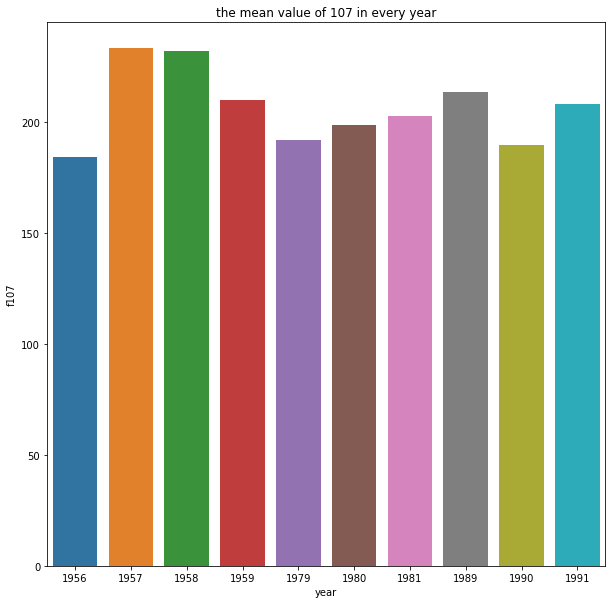

In [17]:
fig = plt.figure(figsize = (10, 10))
# creating the bar plot
sns.barplot(data = z ,x = 'year' ,y = 'absolute_f107 (solar flux unit (SFU))' )
plt.ylabel("f107")
plt.xlabel("year")
plt.title("the mean value of 107 in every year")
plt.show()

In [18]:
b=x.tail(10)

In [19]:
b

,year,absolute_f107 (solar flux unit (SFU))
2,1953,73.533699
25,1976,73.382240
56,2007,73.095068
13,1964,72.579508
68,2019,72.570685
45,1996,72.047541
67,2018,70.629315
58,2009,70.561096
3,1954,70.070137
57,2008,69.001913


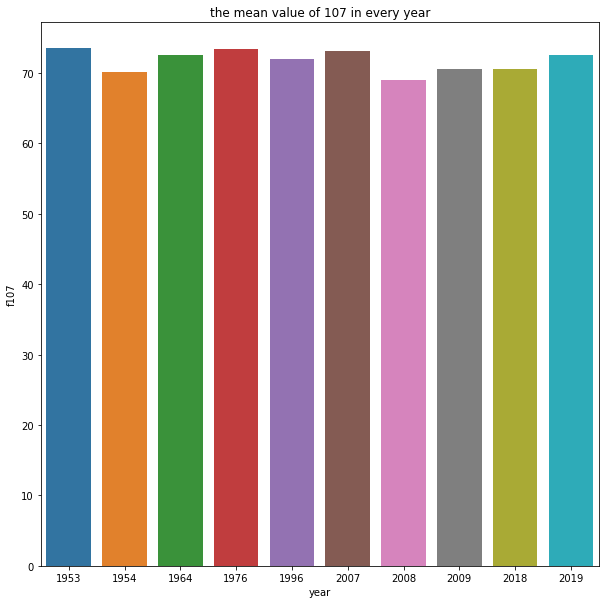

In [20]:
fig = plt.figure(figsize = (10, 10))
# creating the bar plot
sns.barplot(data = b ,x = 'year' ,y = 'absolute_f107 (solar flux unit (SFU))' )
plt.ylabel("f107")
plt.xlabel("year")
plt.title("the mean value of 107 in every year")
plt.show()

In [21]:
dataset.drop('year',axis=1,inplace=True)

In [22]:
dataset.set_index('time (yyyy MM dd)',inplace=True)

In [23]:
dataset.head()

,absolute_f107 (solar flux unit (SFU))
time (yyyy MM dd),
1951-11-01,107.3
1951-11-02,104.7
1951-11-03,106.1
1951-11-04,107.2
1951-11-05,114.0


In [24]:
dataset.tail()

,absolute_f107 (solar flux unit (SFU))
time (yyyy MM dd),
2022-08-27,128.0
2022-08-28,252.0
2022-08-29,131.0
2022-08-30,126.0
2022-08-31,113.0


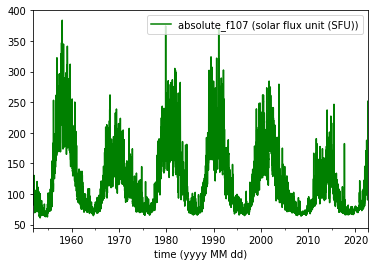

In [25]:
dataset.plot(color='green')

In [26]:
data_1960 = dataset[(dataset.index>'1951-11-01') & (dataset.index<'1960-01-01')]
data_1970 = dataset[(dataset.index>'1960-01-01') & (dataset.index<'1970-01-01')]
data_1980 = dataset[(dataset.index>'1970-01-01') & (dataset.index<'1980-01-01')]
data_1990 = dataset[(dataset.index>'1980-01-01') & (dataset.index<'1990-01-01')]
data_2000 = dataset[(dataset.index>'1990-01-01') & (dataset.index<'2000-01-01')]
data_2010 = dataset[(dataset.index>'2000-01-01') & (dataset.index<'2010-01-01')]
data_2022 = dataset[(dataset.index>'2010-01-01') & (dataset.index<'2022-08-31')]

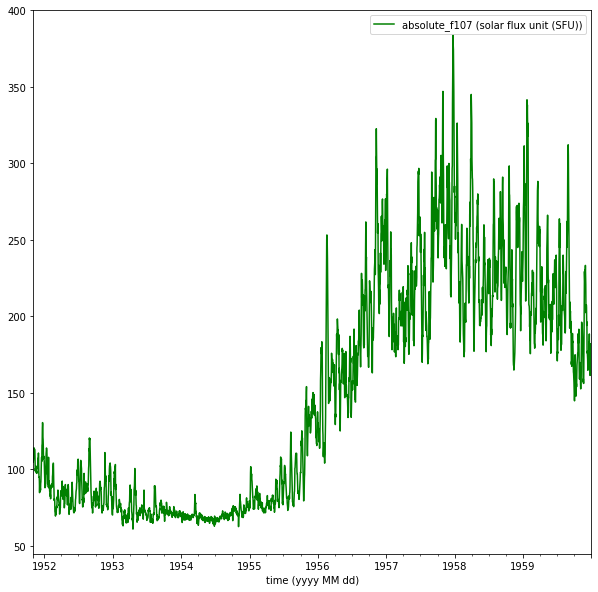

In [27]:
data_1960.plot(figsize=(10,10),color='green')

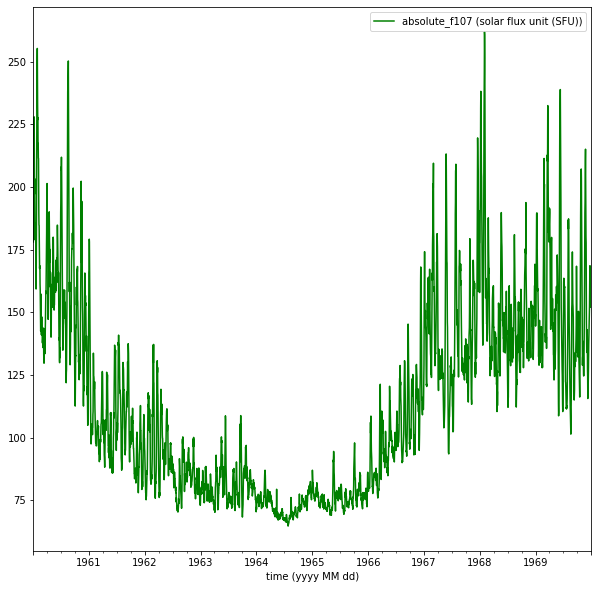

In [28]:
data_1970.plot(figsize=(10,10),color='green')

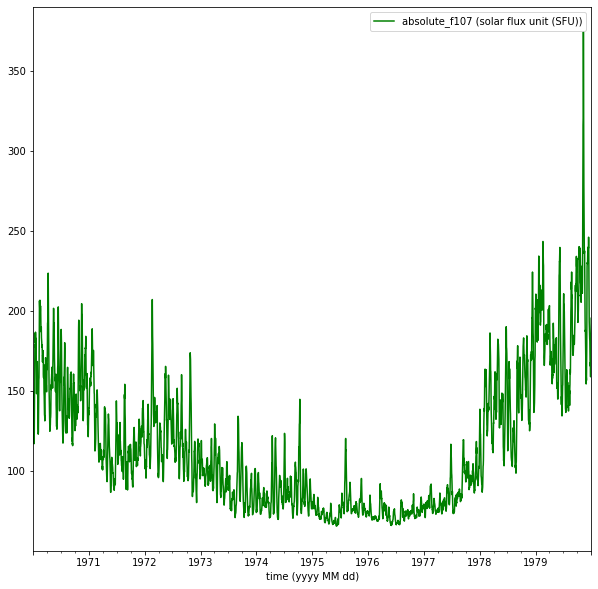

In [29]:
data_1980.plot(figsize=(10,10),color='green')

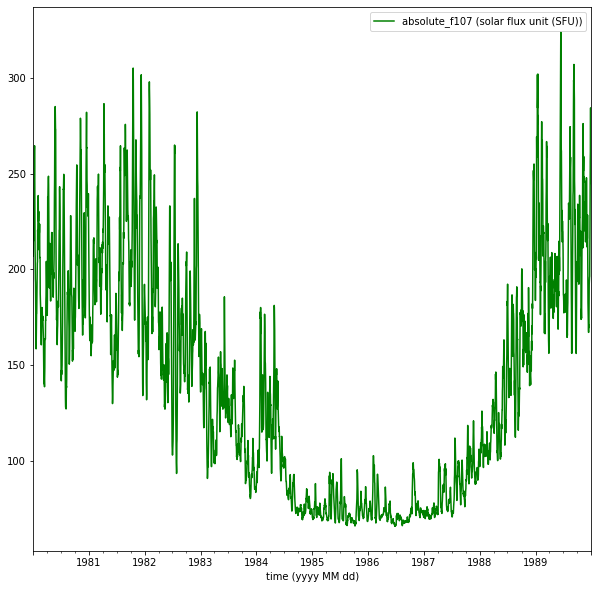

In [30]:
data_1990.plot(figsize=(10,10),color='green')

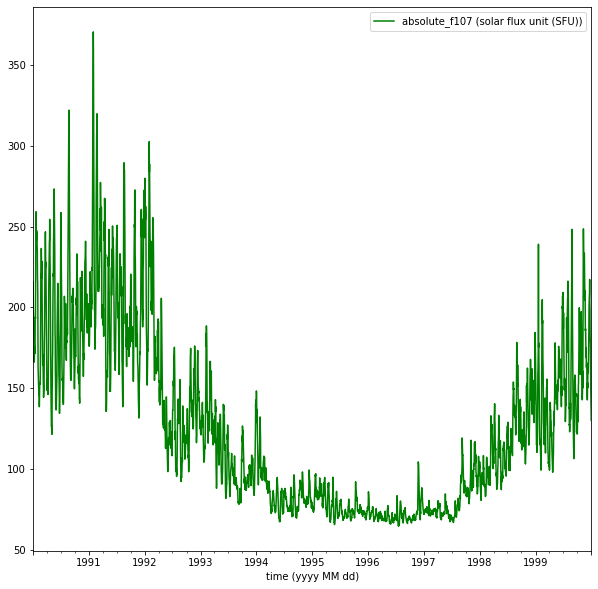

In [31]:
data_2000.plot(figsize=(10,10),color='green')

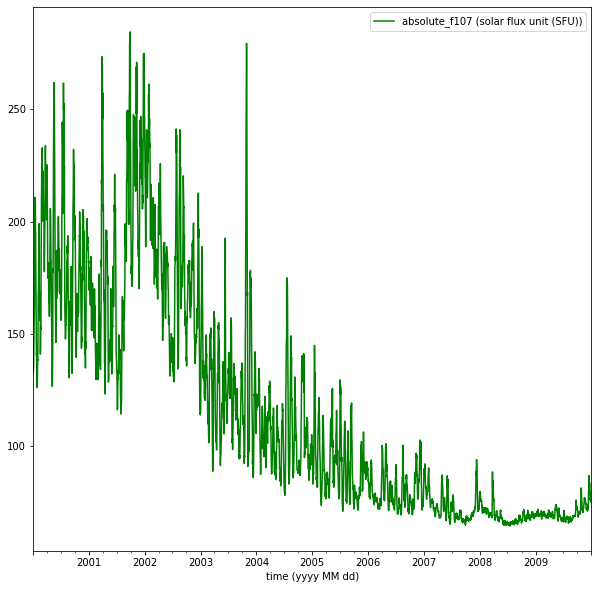

In [32]:
data_2010.plot(figsize=(10,10),color='green')

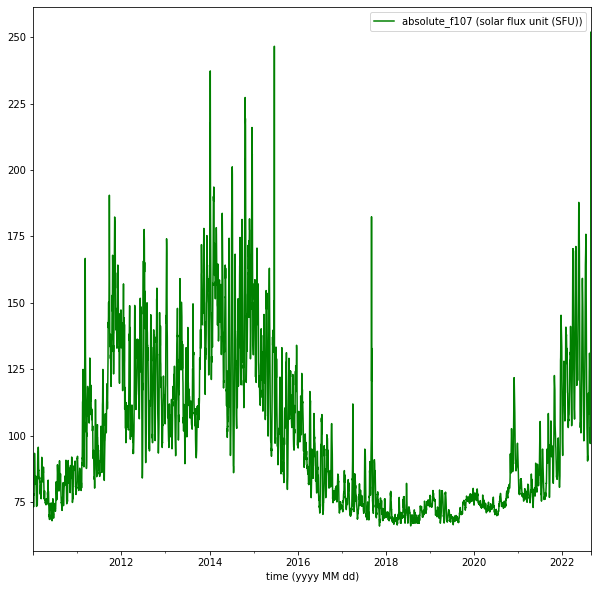

In [33]:
data_2022.plot(figsize=(10,10),color='green')

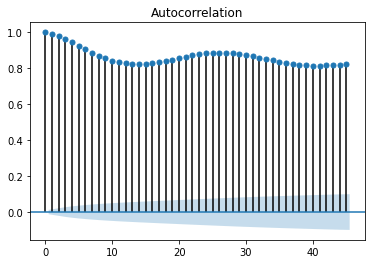

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dataset);

At this point, we should check for the autocorrelation between the values.

In time series analysis, the autocorrelation is a correlation between two consecutive points because sometimes it may happen that the previous value is affecting its future value. More formally, data points are relational.

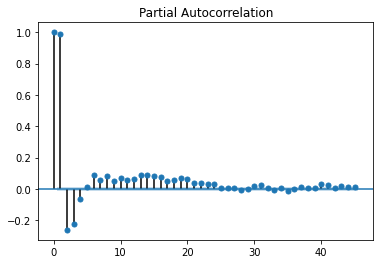

In [35]:
plot_pacf(dataset);

# **Preparing Data**

In [36]:
dataset

,absolute_f107 (solar flux unit (SFU))
time (yyyy MM dd),
1951-11-01,107.3
1951-11-02,104.7
1951-11-03,106.1
1951-11-04,107.2
1951-11-05,114.0
...,...
2022-08-27,128.0
2022-08-28,252.0
2022-08-29,131.0


In [37]:
df=dataset.reset_index(drop=True)

In [38]:
df

,absolute_f107 (solar flux unit (SFU))
0,107.3
1,104.7
2,106.1
3,107.2
4,114.0
...,...
25867,128.0
25868,252.0
25869,131.0
25870,126.0


In [39]:
df=np.array(df).reshape(-1,1)

# **Bulding Model**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler= MinMaxScaler()
data=scaler.fit_transform(df)

In [42]:
train_size=20000
test_size=5000

In [43]:
train=data[0:train_size,:]
test=data[train_size:,:]

In [44]:
train.shape

(20000, 1)

In [45]:
test.shape

(5872, 1)

In [46]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [48]:
X_train.shape

(19998, 1)

In [49]:
X_train

array([[0.14338805],
       [0.13533602],
       [0.13967172],
       ...,
       [0.03995045],
       [0.03530505],
       [0.03623413]])

In [50]:
X_test, y_test = get_data(test, look_back)

In [51]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [52]:
X_train.shape

(19998, 1, 1)

In [53]:
type(y_test)

numpy.ndarray

In [54]:
y_test

array([0.02632394, 0.02632394, 0.02725302, ..., 0.5915144 , 0.21678538,
       0.20130071])

In [55]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'Nadam')

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
19998/19998 [==============================] - 49s 2ms/step - loss: 9.3504e-04
Epoch 2/50
19998/19998 [==============================] - 42s 2ms/step - loss: 4.9134e-04
Epoch 3/50
19998/19998 [==============================] - 40s 2ms/step - loss: 4.9141e-04
Epoch 4/50
19998/19998 [==============================] - 39s 2ms/step - loss: 4.9422e-04
Epoch 5/50
19998/19998 [==============================] - 40s 2ms/step - loss: 4.9199e-04
Epoch 6/50
19998/19998 [==============================] - 39s 2ms/step - loss: 4.9147e-04
Epoch 7/50
19998/19998 [==============================] - 39s 2ms/step - loss: 4.9151e-04
Epoch 8/50
19998/19998 [==============================] - 39s 2ms/step - loss: 4.9073e-04
Epoch 9/50
19998/19998 [==============================] - 39s 2ms/step - loss: 4.8946e-04
Epoch 10/50
19998/19998 [==============================] - 38s 2ms/step - loss: 4.9010e-04
Epoch 11/50
19998/19998 [==============================] - 37s 2ms/step - loss: 4.9198e-04
Epoch 12

In [58]:
y_pred = model.predict(X_test)

In [59]:
scaler.scale_

array([0.00309693])

In [60]:
y_pred = scaler.inverse_transform(y_pred)

In [61]:
y_pred[5800:-1,:]

array([[149.00131 ],
       [140.94862 ],
       [131.76561 ],
       [122.79542 ],
       [116.09857 ],
       [109.09838 ],
       [103.64743 ],
       [ 99.33172 ],
       [ 98.71551 ],
       [100.35891 ],
       [101.28359 ],
       [102.00291 ],
       [103.236244],
       [108.7897  ],
       [113.8331  ],
       [119.910034],
       [126.30017 ],
       [133.31288 ],
       [143.63242 ],
       [157.67738 ],
       [164.70297 ],
       [166.9762  ],
       [169.45612 ],
       [171.62602 ],
       [177.412   ],
       [178.96165 ],
       [167.6995  ],
       [156.74765 ],
       [148.07196 ],
       [140.53578 ],
       [130.01228 ],
       [121.043465],
       [113.93605 ],
       [108.27529 ],
       [103.955826],
       [100.8726  ],
       [ 98.40744 ],
       [ 94.19945 ],
       [ 91.22597 ],
       [ 90.9185  ],
       [ 92.76366 ],
       [ 91.53344 ],
       [ 98.71551 ],
       [100.76986 ],
       [110.02449 ],
       [115.171715],
       [117.23154 ],
       [117.2

In [62]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [63]:
y_test[5800:-1,:]

array([[139. ],
       [130.1],
       [121.4],
       [114.9],
       [108.1],
       [102.8],
       [ 98.6],
       [ 98. ],
       [ 99.6],
       [100.5],
       [101.2],
       [102.4],
       [107.8],
       [112.7],
       [118.6],
       [124.8],
       [131.6],
       [141.6],
       [155.2],
       [162. ],
       [164.2],
       [166.6],
       [168.7],
       [174.3],
       [175.8],
       [164.9],
       [154.3],
       [145.9],
       [138.6],
       [128.4],
       [119.7],
       [112.8],
       [107.3],
       [103.1],
       [100.1],
       [ 97.7],
       [ 93.6],
       [ 90.7],
       [ 90.4],
       [ 92.2],
       [ 91. ],
       [ 98. ],
       [100. ],
       [109. ],
       [114. ],
       [116. ],
       [116. ],
       [113. ],
       [109. ],
       [108. ],
       [115. ],
       [120. ],
       [124. ],
       [126. ],
       [131. ],
       [129. ],
       [123. ],
       [117. ],
       [105. ],
       [102. ],
       [ 97. ],
       [103. ],
       [

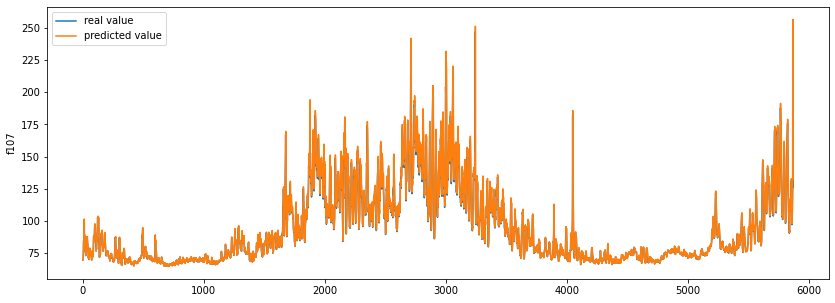

In [64]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real value')
plt.plot(y_pred, label = 'predicted value')
plt.ylabel('f107')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.960599905726531

In [66]:
#Acurracy of prediction train
y_pred1= model.predict(X_train)
y_pred1= scaler.inverse_transform(y_pred1)
y_train = y_train.reshape(-1, 1)
y_train = scaler.inverse_transform(y_train)
r2_score(y_train , y_pred1)

0.9821829361877767

In [67]:
lis=[]
b=np.array([126.0])
for n in range(356):
  z=b.reshape(1,-1)
  z=scaler.transform(z)
  z = z.reshape((1, look_back, 1))
  ypred2 = model.predict(z, verbose=0)
  ypred2 =scaler.inverse_transform(ypred2)
  lis.append(ypred2)
  b=ypred2
  n=n+1
print('the predict new year',lis)

the predict new year [array([[127.5374]], dtype=float32), array([[129.12271]], dtype=float32), array([[130.75763]], dtype=float32), array([[132.44395]], dtype=float32), array([[134.1835]], dtype=float32), array([[135.9782]], dtype=float32), array([[137.83005]], dtype=float32), array([[139.74113]], dtype=float32), array([[141.71361]], dtype=float32), array([[143.7497]], dtype=float32), array([[145.85173]], dtype=float32), array([[148.02211]], dtype=float32), array([[150.26335]], dtype=float32), array([[152.57805]], dtype=float32), array([[154.96889]], dtype=float32), array([[157.43863]], dtype=float32), array([[159.99013]], dtype=float32), array([[162.6263]], dtype=float32), array([[165.3501]], dtype=float32), array([[168.16457]], dtype=float32), array([[171.07277]], dtype=float32), array([[174.0777]], dtype=float32), array([[177.18234]], dtype=float32), array([[180.38959]], dtype=float32), array([[183.70216]], dtype=float32), array([[187.1225]], dtype=float32), array([[190.65276]], dty